# Basic use of scikit-learn

Scikit-learn is a well-known library for Machine Learning. It implements many basic "methods", and it is widely used in the community, both for research and in the industry.

In this lab exercise, you will make the first steps with this library.

Start by learning this introduction page: https://scikit-learn.org/1.4/tutorial/basic/tutorial.html

**Note:** You may not known some methods that are discussed in the tutorial page. Don't focus on that but on the general philosophy of Scikit-learn.

In the following, try to explore the data, different functions etc, by writting and executing a few lines of Python code! It is a good idea to always prototype simple example, to edit the code to check what works and what doesn't work, what are the shape of different tensors, what they contain, etc.

Questions are there to help you identify what is important. Try to answer them, but you don't need to submit your answers.

**WARNING:** The exam may contain questions about lab exercices.

# 1. Loading pre-formated data

We will use the IRIS dataset as a first example. You can read about this dataset on wikipedia: https://fr.wikipedia.org/wiki/Iris_de_Fisher

The following bloc of code load the data.

In [1]:
# load the IRIS dataset
from sklearn.datasets import load_iris
irisData=load_iris()
# get info on the dataset
#print(irisData.data)
print(irisData.target)
print(irisData.target_names)
print(irisData.feature_names)
#print(irisData.DESCR)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
Answer question 1: supervised learning - classification

In [ ]:
Answer question 2: There are 4 features which are sepal length, sepal width, petal length, petal width

**Q1:** What type of machine learning problem is that?

**Q2:** How many features are there? What kind of features?

# 2. Plotting the data

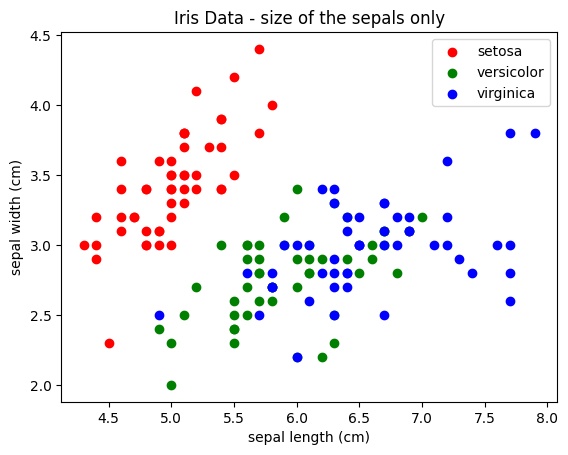

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt # replace the name "pyplot" by "plt" 
X=irisData.data
y=irisData.target
xi=0
yi=1

colors=["red","green","blue"] # associate a color to each class label
for num_label in range(3): # for each label
    plt.scatter(
        X[y==num_label][:, xi],
        X[y==num_label][:,yi],
        color=colors[num_label],
        label=irisData.target_names[num_label]
    )
plt.legend()
plt.xlabel(irisData.feature_names[xi]) 
plt.ylabel(irisData.feature_names[yi])
plt.title("Iris Data - size of the sepals only") 
plt.show()

**Q3:** From the previous visualisation, what can you predict about the difficulty of this dataset?

In [ ]:
Answer question 3: 

L'espèce Setosa (souvent en rouge) est généralement bien séparée des autres classes. Cela signifie qu'elle est facile à reconnaître.
Les espèces Versicolor et Virginica (souvent vert et bleu) peuvent se chevaucher, ce qui rend leur distinction plus difficile avec uniquement ces deux caractéristiques.

# 3. Classification with k-nearest neighbors

We will now use a k-nearest neighbors classifier on this dataset. Start by reading the documentation page: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

And then study the code below.
Try to use different values for k (called `nb_neighb` in the code).

In [8]:
from sklearn import neighbors

nb_neighb = 15
# to know more about the parameters, type help(neighbors.KNeighborsClassifier)
clf = neighbors.KNeighborsClassifier(nb_neighb)

clf.fit(X, y) # training
print('accuracy on training data is', clf.score(X,y))

# to predict on a specific example
print('class predicted is', clf.predict([[ 5.4, 3.2, 1.6, 0.4]]))
print('proba of each class is', clf.predict_proba([[ 5.4, 3.2, 1.6, 0.4]]))

y_pred = clf.predict(X)
print('misclassified training examples are:',X[y_pred!=y])

accuracy on training data is 0.9866666666666667
class predicted is [0]
proba of each class is [[1. 0. 0.]]
misclassified training examples are: [[6.  2.7 5.1 1.6]
 [4.9 2.5 4.5 1.7]]


**Q4:** What kind of problem do you see with the evaluation?

In [ ]:
Answer question 4:

Le problème ici est que l'évaluation est faite sur les données d'entraînement et non sur un jeu de test indépendant.
1 - Surestimation de la performance car l'algorithme K-Nearest Neighbors (KNN) est un modèle qui mémorise les données d'entraînement. 
    Tester sur les mêmes données peut donner une précision artificiellement élevée, car le modèle a directement accès aux exemples qu'il a déjà vus.
2 - Absence de validation croisée ou de jeu de test car normalement, on devrait diviser les données en deux ensembles :
    Entraînement (ex. 80%) pour ajuster le modèle.
    Test (ex. 20%) pour évaluer sa vraie capacité de généralisation.
3 - Nombre de voisins élevé car il peut lisser excessivement les frontières de décision et ne pas bien capturer la structure locale des données.

## 3.1 About training and test sets

if we want a test set and a training set, we can split the data

In [9]:
X_train, y_train = X[0:100], y[0:100] # 100 examples for training
X_test, y_test = X[100:], y[100:] # rest for testing

Here is a much better way to split the data into training and test sets.
Again, start by reading the document page of the `train_test_split` function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**Q5:** Explain why it is a really bad idea to split this iris dataset as we've done.

In [ ]:
Answer question 5:

Le problème principal avec cette méthode de division des données est que la séparation n'est pas aléatoire. 
L'indexation [0:100] pour l'entraînement et [100:] pour le test introduit un biais majeur car les données de l'Iris dataset sont ordonnées par classe.

En apprentissage supervisé, il est crucial que l’ensemble d’entraînement représente bien toutes les classes pour que le modèle puisse apprendre à les distinguer correctement.
Une séparation correcte doit mélanger les exemples des trois classes.

In [10]:
from sklearn.model_selection import train_test_split 
import random # to generate random numbers

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=random.seed()
)
print(
    'size of train / test = ',
    len(X_train),
    len(X_test)
)

print(
    'nb of training data with class 0/1/2 =',
    len(X_train[y_train==0]),
    len(X_train[y_train==1]),
    len(X_train[y_train==2])
)


size of train / test =  105 45
nb of training data with class 0/1/2 = 35 37 33


You can now train and evaluate on two different parts of the original data.

To display the results, we build a confusion matrix. Start by reading:

- the wikipedia page: https://en.wikipedia.org/wiki/Confusion_matrix
- the scikitlearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [11]:
from sklearn.metrics import confusion_matrix

clf=clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n',cm)


Confusion matrix
 [[15  0  0]
 [ 0 12  1]
 [ 0  0 17]]


**Q6:** What is on the diagonal of the confusion matrix?

**Q7:** What is the real error rate (give details)?

In [ ]:
Answer question 6:

La matrice de confusion est une matrice 3×3×3 (puisqu'il y a 3 classes) où :
    Chaque ligne correspond à une classe réelle (valeurs de y_test).
    Chaque colonne correspond à une classe prédite (valeurs de y_pred).

Interprétation de la diagonale :
    La diagonale de la matrice contient les valeurs où la prédiction est correcte.
    Autrement dit, pour chaque classe, le nombre d'éléments bien classés se trouve sur la diagonale.

Ici,
    15 est le nombre d’exemples de la classe 0 (Setosa) bien classés.
    12 est le nombre d’exemples de la classe 1 (Versicolor) bien classés.
    17 est le nombre d’exemples de la classe 2 (Virginica) bien classés.

In [ ]:
Answer question 7:

Le taux d’erreur est la proportion d’exemples mal classés. 
Erreur = nombre total d'erreurs / nombre total d'exemples test

Nombre total d'erreurs correspond aux valeurs qui sont hors de la diagonale. Ici, c'est 1
Nombre total d'exemples test est la somme des valeurs dans la diagonale. Ici, c'est 15 + 12 + 17 = 44

Donc, erreur = 1 / 44 = 2.273%

## 3.2 K-fold

The dataset is small, therefore there might be a high variance in test evaluation results.
One solution to alleviate this issue, is to evaluate the model on different train/test splits.
This approach is caleld k-fold.

Start by reading the section about this approach in the documention: https://scikit-learn.org/stable/modules/cross_validation.html#k-fold

And then try to understand the code below.

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

nb_folds = 10
kf=KFold(n_splits=nb_folds,shuffle=True)
score=0
for training_ind,test_ind in kf.split(X):
    #print("training index: ",training_ind,"\ntest index:",test_ind,'\n') 
    X_train=X[training_ind]
    y_train=y[training_ind]
    clf.fit(X_train, y_train)
    X_test=X[test_ind]
    y_test=y[test_ind]
    y_pred = clf.predict(X_test)
    score = score + accuracy_score(y_pred,y_test)

print('average accuracy:',score/nb_folds)

average accuracy: 0.9800000000000001


or as a one-liner:

In [13]:
from sklearn.model_selection import cross_val_score
t_scores = cross_val_score(clf, X, y, cv=10)
print(t_scores.mean())

0.9733333333333334


# 4. Decision tree

In this second part, we will build a decision tree using scikitlearn.
Start by reading the documentation: https://scikit-learn.org/stable/modules/tree.html#tree

To read the data, we will use the pandas libraries, which simplify data manipulation.

In [14]:
# we will use another dataset (a CSV file). Pandas helps us to read this type of file.

import pandas as pd

data = 'heart.csv'
df = pd.read_csv(data)


X = df.drop(columns=['target'])
y = df['target']


X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

features = X.columns
classes = ['Not heart disease','heart disease']

print (features)

df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


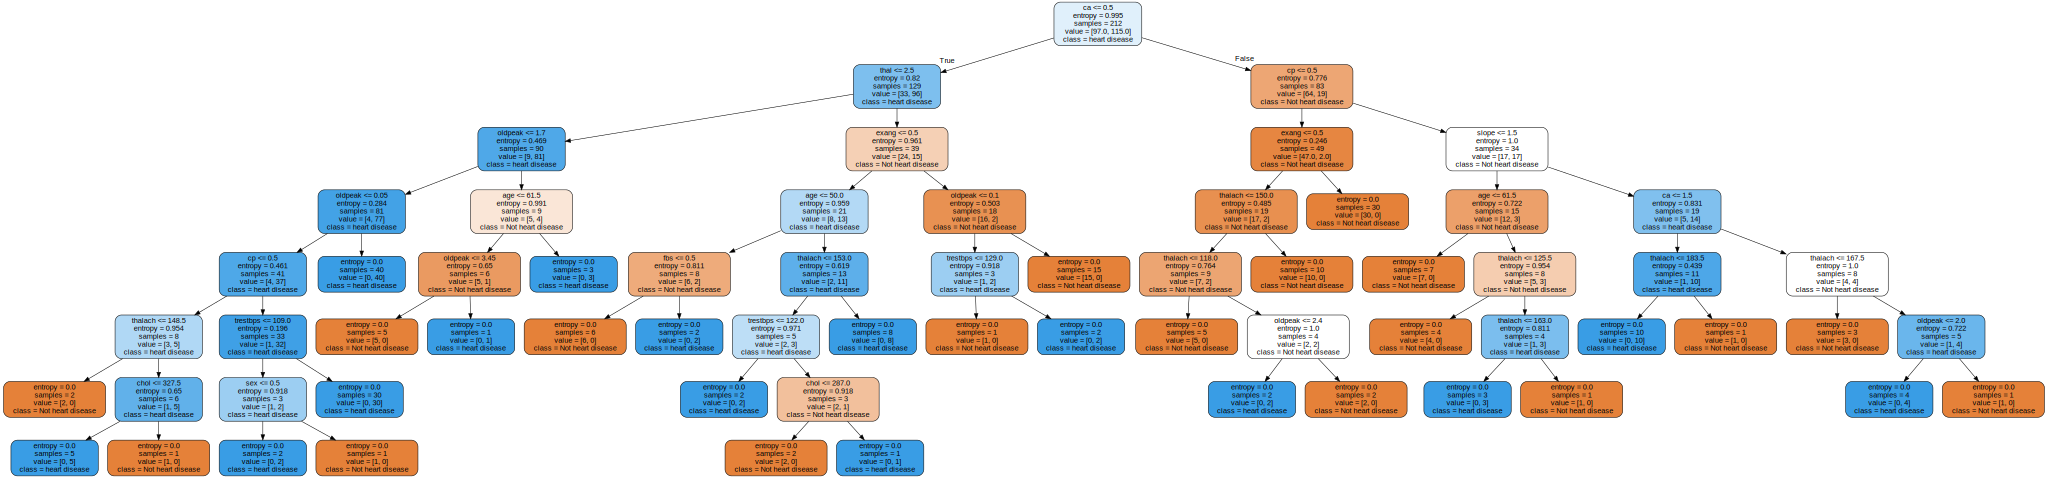

In [15]:
from sklearn import tree
from graphviz import Source

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=20,criterion='entropy')
clf.fit(X_train, y_train)

graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=features,
                                    class_names=classes,
                                    filled=True, rounded=True))
graph

If Graphviz is not working with your setup, look at http://people.irisa.fr/Vincent.Claveau/cours/fd/TP1.html

**Q8:** Explain each line displayed in the nodes/leaves of the tree.
    
**Q9:** What is the name of this decision tree according to the course?


In [ ]:
Answer question 8:

Critère de décision (feature et seuil):
    En haut de chaque nœud interne, on trouve une caractéristique utilisée pour diviser les données et la valeur seuil qui sépare les classes.
    Ici, on utilise la valeur de ca pour classifier car il n'a que 2 valeurs qui sont 0 et 1

Entropie (ou autre critère d'impureté):
    Comme on utilise criterion='entropy', chaque nœud affiche l'entropie avant la séparation.
    Une entropie proche de 0 signifie que le nœud contient principalement une seule classe (peu d’incertitude), 
    alors qu’une entropie proche de 1 indique un mélange plus équilibré des classes.

Nombre d’exemples dans le nœud:
    Indiqué par samples, il donne le nombre total d’exemples restants dans ce nœud après les séparations précédentes.

Répartition des classes (value):
    Montre le nombre d'exemples dans chaque classe après la séparation.
    Exemple: value = [97, 115]
        97 exemples appartiennent à la classe "Not heart disease"
        115 exemples appartiennent à la classe "Heart disease"

Classe prédite:
    La classe majoritaire dans ce nœud est affichée à la fin.
    Exemple: class = heart disease signifie que le modèle prédit que les exemples de ce nœud appartiennent majoritairement à la classe "Heart disease"

In [ ]:
Answer question 9:

Ce type d’arbre est un "Arbre de classification basé sur l’entropie" car :
    Il est construit avec l’algorithme ID3 (ou C4.5, selon la version).
    Il utilise le critère de l'entropie pour diviser les nœuds (criterion='entropy').
    Il maximise le gain d’information à chaque division.

Si l'on utilisait criterion='gini', ce serait un "Arbre basé sur l’indice de Gini", utilisé par CART (Classification And Regression Trees).

Here is another nice viz of the decision tree. (The dtreeviz package is available in github. It can be installed with 'pip install dtreeviz'. It requires graphviz to be installed.)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

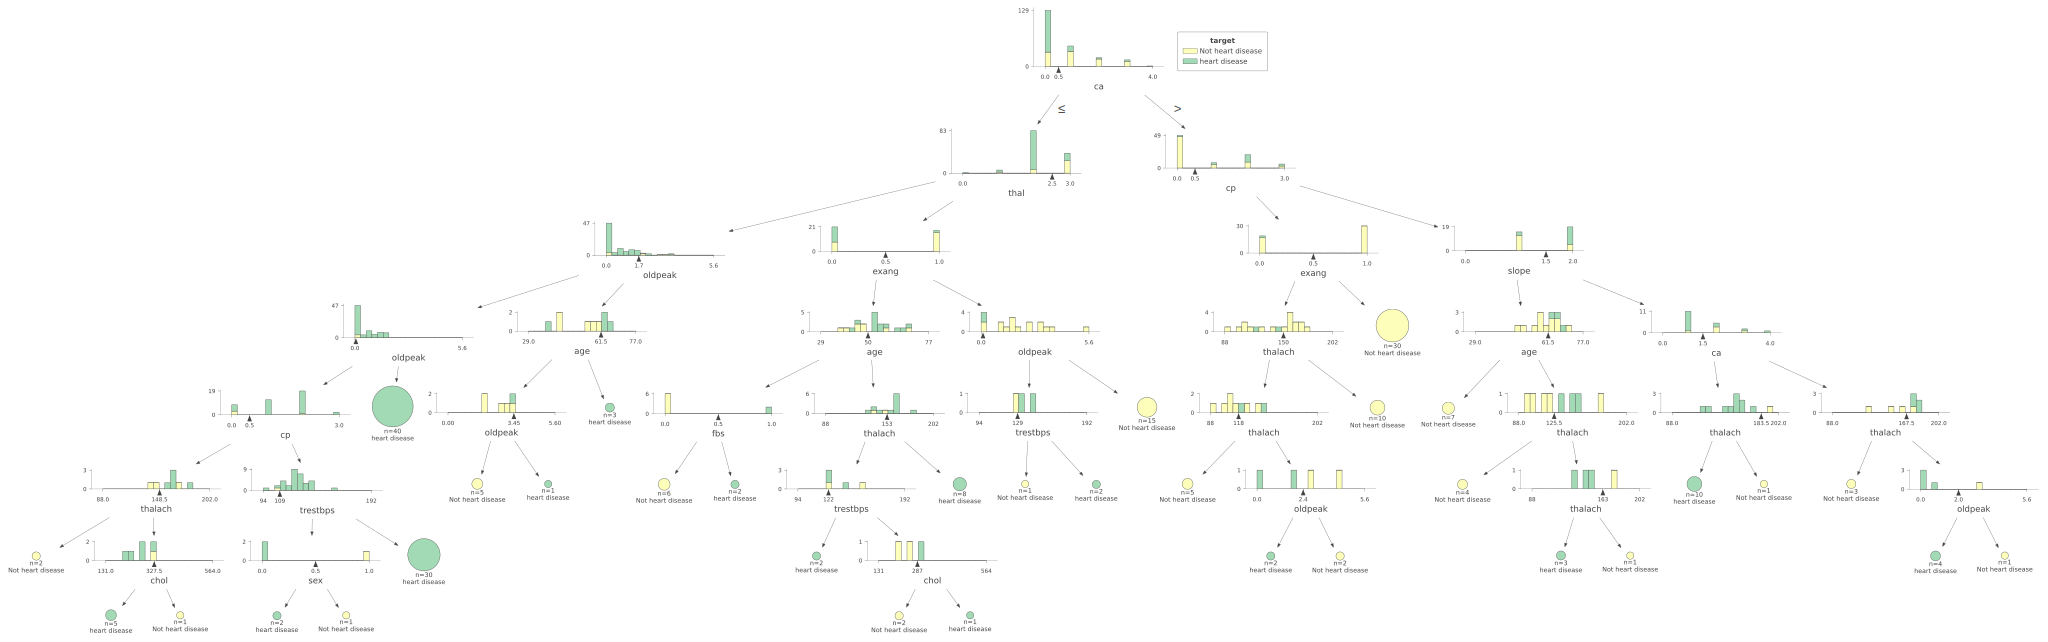

In [21]:
#from dtreeviz.trees import dtreeviz # remember to load the package (depending on the library version, comment and uncomment lines)
from dtreeviz import *
#model or dtreeviz
graph = model(clf, X_train, y_train,
                target_name="target",
                feature_names=features,
                class_names=classes
                )

#graph
graph.view()


**Q10:** Explain what are the histograms displayed.

In [ ]:
Answer question 10:

L'outil dtreeviz offre une visualisation avancée des arbres de décision avec des histogrammes intégrés dans les nœuds de l’arbre. 
Ces histogrammes permettent de mieux comprendre comment les données sont séparées à chaque étape.

1. Que représentent ces histogrammes ?
    Chaque nœud de l’arbre contient un histogramme qui montre la distribution des données pour la caractéristique utilisée dans la séparation.
    L'axe horizontal (X) correspond aux valeurs de la caractéristique choisie.
    L'axe vertical (Y) représente le nombre d'exemples dans chaque classe pour cette caractéristique.

2. Couleurs et interprétation
    Chaque classe est représentée par une couleur différente (par ex. jaune = "Not heart disease", vert = "heart disease").
    Les barres de l'histogramme montrent comment les valeurs de la caractéristique se répartissent avant et après la séparation.
    La ligne verticale représente le seuil de décision appliqué par le modèle.

3. Comment utiliser ces histogrammes ?
    Si les distributions sont bien séparées, cela signifie que la caractéristique est un bon critère pour différencier les classes.
    Si les distributions sont très mélangées, alors cette caractéristique ne permet pas une séparation nette et pourrait être moins utile pour la décision.

**Q11** From the sklearn manual, explain what effectmax_depth or min_samples_split will have on the decision tree. If time permits, show the effects experimentally.

In [ ]:
Answer question 11:

Dans sklearn, ces deux paramètres contrôlent la complexité et la généralisation de l’arbre de décision :
Paramètre	        Effet principal	                                                      Conséquence si trop grand	                                  Conséquence si trop petit
max_depth	        Limite la profondeur maximale de l'arbre	                          Sur-apprentissage (arbre trop complexe)	                  Sous-apprentissage (arbre trop simple, pas assez de divisions)
min_samples_split	Définit le nombre minimal d'échantillons requis pour diviser un nœud  Sous-apprentissage (moins de divisions, arbre plus simple)  Sur-apprentissage (arbre plus profond, plus de divisions)

max_depth contrôle la taille maximale de l’arbre → plus il est grand, plus l’arbre est complexe.
min_samples_split contrôle le nombre minimum d’échantillons pour diviser un nœud → plus il est petit, plus l’arbre sera profond.

### Pruning Tmax

Firsm check the documentation, again: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Here, we use a critrion called "Cost Complexity". Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

In [ ]:
# For each alpha we will append our model to a list
t_clf = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    t_clf.append(clf)
    
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
t_clf = t_clf[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in t_clf]
depth = [clf.tree_.max_depth for clf in t_clf]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.title('Tree complexity vs alpha')
plt.show()


# accuracy versus alpha
train_acc = []
val_acc = []
for c in t_clf:
    y_train_pred = c.predict(X_train)
    y_val_pred = c.predict(X_val)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    val_acc.append(accuracy_score(y_val_pred,y_val))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,val_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,val_acc,label='val_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

**Q12:** from the graph above, what is the best value for alpha. Replace it in the first line below .

In [ ]:
best_alpha = 0.12 # <-- replace this value
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=best_alpha)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_val_pred = clf_.predict(X_val)

print('Train score', accuracy_score(y_train_pred,y_train))
print(confusion_matrix(y_train_pred,y_train))

print('Validation score', accuracy_score(y_val_pred,y_val))
print(confusion_matrix(y_val_pred,y_val))